In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [142]:
data2 = copy.deepcopy(data)
data2.insert(loc=0, column='cost', value=[1 for i in range(data.shape[0])])
data2.head()

,cost,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [143]:
ex1 = data2['Exam 1']
ex2 = data2['Exam 2']


data2["Exam 1"] = [(i - ex1.mean())/ex1.std() for i in ex1]
data2["Exam 2"] = [(i - ex2.mean())/ex2.std() for i in ex2]


X = np.array(data2[['cost', 'Exam 1', 'Exam 2']])
y = np.array(data2['Admitted'])

print(y.shape[0], X.shape[0])

100 100


In [144]:
admitted = []
not_admitted = []
X = np.array(data2[['cost', 'Exam 1', 'Exam 2']])
y = np.array(data2['Admitted'])




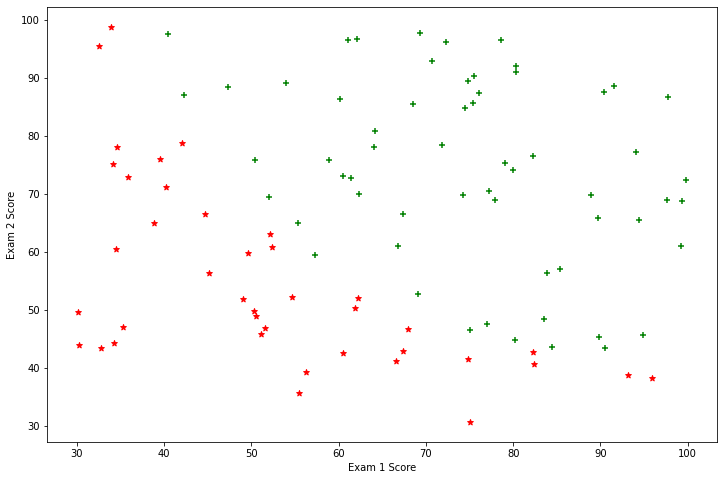

In [145]:
# w/o normalization
Xb = np.array(data[['Exam 1', 'Exam 2']])
yb = np.array(data['Admitted'])

for i in range(yb.shape[0]):
    if yb[i]:
        admitted.append(Xb[i])
    else:
        not_admitted.append(Xb[i])
admitted = np.array(admitted)
not_admitted = np.array(not_admitted)

plt.figure(figsize=(12,8))
plt.scatter(admitted[:, 0], admitted[:, 1], marker='+', c='g', label='Not Admitted')
plt.scatter(not_admitted[:, 0], not_admitted[:, 1], marker='*', c='r', label='Not Admitted')
plt.xlabel("Exam 1 Score")
plt.ylabel('Exam 2 Score')
plt.show()


In [146]:
def sig(t):
    return 1 / (1 + np.exp(-t)) 

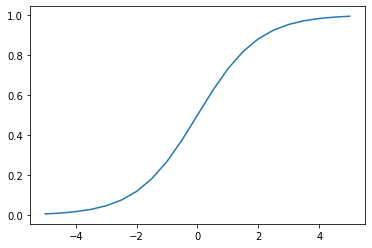

In [147]:
x_l = np.linspace(-5, 5, 21)
plt.plot(x_l, sig(x_l))
plt.show()

In [148]:
def cost(theta, X, y):
    h = sig(X @ theta)
    yt = y.T
    return 1/y.shape[0] * (-yt @ np.log(h) - (1 - yt) @ np.log(1 - h))

theta = np.zeros(3)
print(cost(theta, X, y))

0.6931471805599453


In [149]:
def simple_gradient(X, y, theta, alpha, it):
    m = len(y)
    costs = np.zeros(it)
    for i in range(it):
        h = sig(X @ theta)
        for k in range(3):
            theta[k] = theta[k] - alpha/m * np.sum((np.subtract(h.T,y).T) @ (np.matrix(X[:,k]).T)) 
        costs[i] = cost(theta, X, y)
    return theta, costs


alpha = 1
it = 150
theta, cst = simple_gradient(X,y,theta,alpha,it)
print(f'Theta: {theta} Final cost: {cst[-1]}')

Theta: [1.41682812 3.36988187 3.122184  ] Final cost: 0.2064705442318259


In [150]:
# accuracy
acc = sig(X.dot(theta)) >= 0.5
acc = acc.astype(int)
print(f'Accuracy: {acc}')

Accuracy: [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]


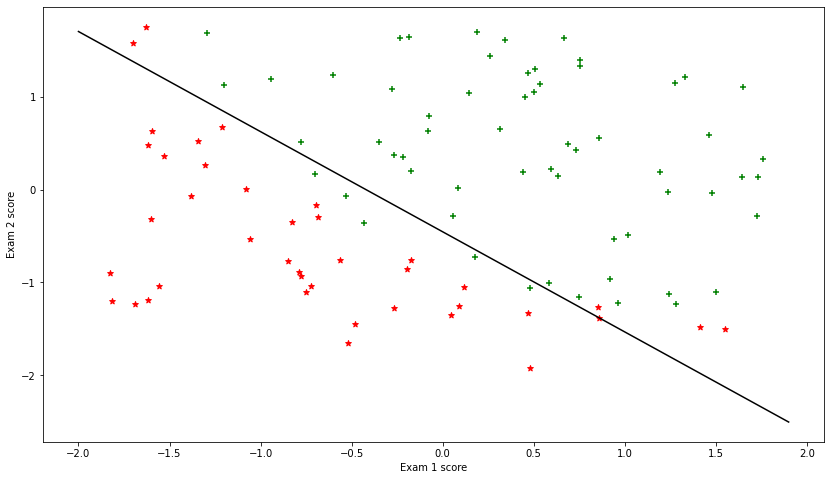

In [151]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0]/theta[2] - theta[1]/theta[2] * x1
# normalization
admitted = []
not_admitted = []
Xb = np.array(data2[['Exam 1', 'Exam 2']])
yb = np.array(data2['Admitted'])

for i in range(yb.shape[0]):
    if yb[i]:
        admitted.append(Xb[i])
    else:
        not_admitted.append(Xb[i])
admitted = np.array(admitted)
not_admitted = np.array(not_admitted)

plt.figure(figsize=(14, 8))
plt.plot(x1, x2, 'k')
plt.scatter(admitted[:, 0], admitted[:, 1], marker='+', c='g', label='Not Admitted')
plt.scatter(not_admitted[:, 0], not_admitted[:, 1], marker='*', c='r', label='Not Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

In [153]:
logreg = LogisticRegression()
logreg.fit(X, Y)

LogisticRegression()

C:\Users\tomek\AppData\Local\Temp/ipykernel_16776/2002939196.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


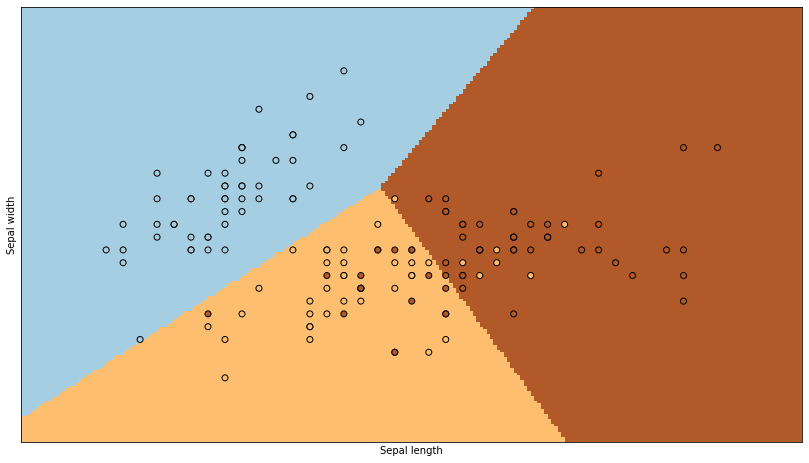

In [154]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(14, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

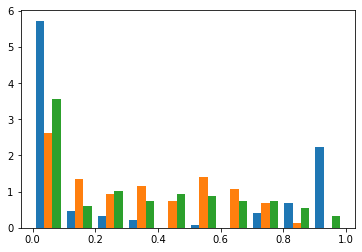

In [155]:
pred = logreg.predict_proba(X)
# gestosc prawdopodobienstwa density
plt.hist(pred, density=True)
plt.show()

In [156]:
from sklearn.metrics import mean_squared_error, r2_score
p = logreg.predict(X)
mse = mean_squared_error(Y, p)
r2 = r2_score(Y, p)

print(f'MSE = {mse}\nR2 = {r2}')

MSE = 0.18
R2 = 0.73
